<a href="https://colab.research.google.com/github/RonnyGuevara/USAL/blob/main/PROYECTO1/USAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lectura de librerías
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lectura de la data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ETL.xlsx')
df

,Edad,Altura,Peso,BECK,Tipo de depresion,STAI.ANSIEDAD,Tipo de ansiedad,Bullying,Sufre de bullying,IMC,Tipo de sobrepeso,Nivel de educación
0,Entre 50 y 59 años,1.50,65.0,3.0,Sin depresion,26.0,Ansiedad sobre promedio mujeres,52.0,Bullying,28.888889,Sobrepeso,Posgrados
1,Entre 20 y 29 años,1.65,61.0,0.0,Sin depresion,26.0,Ansiedad sobre promedio mujeres,49.0,No Bullying,22.405877,Rango normal,Universitario y terciario completo
2,Entre 40 y 49 años,1.52,105.0,22.0,Depresion moderada mujeres,29.0,Ansiedad sobre promedio mujeres,68.0,No Bullying,45.446676,Obesas Clase 3,Universitario incompleto o terciario incompleto
3,Entre 20 y 29 años,1.60,54.0,1.0,Sin depresion,26.0,Ansiedad sobre promedio mujeres,42.0,No Bullying,21.093750,Rango normal,Posgrados
4,Entre 40 y 49 años,1.65,64.0,5.0,Sin depresion,24.0,Ansiedad promedio mujeres,45.0,No Bullying,23.507805,Rango normal,Posgrados
...,...,...,...,...,...,...,...,...,...,...,...,...
69,Entre 40 y 49 años,1.68,80.0,4.0,Sin depresion,27.0,Ansiedad sobre promedio mujeres,79.0,No Bullying,28.344671,Sobrepeso,Universitario incompleto o terciario incompleto
70,Entre 20 y 29 años,1.56,50.0,11.0,Depresion leve mujeres,26.0,Ansiedad sobre promedio mujeres,92.0,Bullying,20.545694,Rango normal,Secundario completo
71,Entre 20 y 29 años,1.62,46.0,2.0,Sin depresion,22.0,Ansiedad tend. promedio mujeres,40.0,Bullying,17.527816,Rango normal,Universitario incompleto o terciario incompleto
72,Entre 20 y 29 años,1.64,59.0,5.0,Sin depresion,27.0,Ansiedad sobre promedio mujeres,55.0,No Bullying,21.936347,Rango normal,Universitario incompleto o terciario incompleto


In [4]:
#Visualización de los atributos
df.columns

Index(['Edad', 'Altura', 'Peso', 'BECK ', 'Tipo de depresion', 'STAI.ANSIEDAD',
       'Tipo de ansiedad', 'Bullying', 'Sufre de bullying', 'IMC',
       'Tipo de sobrepeso', 'Nivel de educación'],
      dtype='object')

In [5]:
#Cuenta los valores nulos para cada columna
df.isna().sum()

Edad                  0
Altura                0
Peso                  0
BECK                  0
Tipo de depresion     0
STAI.ANSIEDAD         0
Tipo de ansiedad      0
Bullying              0
Sufre de bullying     0
IMC                   0
Tipo de sobrepeso     0
Nivel de educación    0
dtype: int64

In [6]:
#Total de valores nulos
df.isnull().values.sum()

0

In [7]:
# Eliminación de valores nulos en caso de tenerlos
df = df.dropna()

In [8]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                74 non-null     object 
 1   Altura              74 non-null     float64
 2   Peso                74 non-null     float64
 3   BECK                74 non-null     float64
 4   Tipo de depresion   74 non-null     object 
 5   STAI.ANSIEDAD       74 non-null     float64
 6   Tipo de ansiedad    74 non-null     object 
 7   Bullying            74 non-null     float64
 8   Sufre de bullying   74 non-null     object 
 9   IMC                 74 non-null     float64
 10  Tipo de sobrepeso   74 non-null     object 
 11  Nivel de educación  74 non-null     object 
dtypes: float64(6), object(6)
memory usage: 7.5+ KB


In [9]:
#Permite obtener los estadísticos descriptivos
df.describe()

,Altura,Peso,BECK,STAI.ANSIEDAD,Bullying,IMC
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.625811,70.381081,10.405405,25.216216,59.324324,26.585722
std,0.065835,16.652654,9.367561,3.508386,20.453829,5.834378
min,1.440000,45.000000,0.000000,19.000000,33.000000,16.528926
25%,1.592500,58.000000,3.000000,23.000000,44.000000,22.146735
50%,1.625000,66.500000,8.000000,25.000000,53.500000,25.233893
75%,1.657500,80.000000,15.750000,27.000000,70.500000,29.865328
max,1.780000,125.000000,42.000000,34.000000,128.000000,45.446676


In [10]:
df.corr()

,Altura,Peso,BECK,STAI.ANSIEDAD,Bullying,IMC
Altura,1.000000,0.359658,0.224914,0.152838,0.329913,-0.012133
Peso,0.359658,1.000000,0.361504,0.099369,0.523422,0.924868
BECK,0.224914,0.361504,1.000000,0.532070,0.540307,0.299246
STAI.ANSIEDAD,0.152838,0.099369,0.532070,1.000000,0.423560,0.048181
Bullying,0.329913,0.523422,0.540307,0.423560,1.000000,0.413068
IMC,-0.012133,0.924868,0.299246,0.048181,0.413068,1.000000


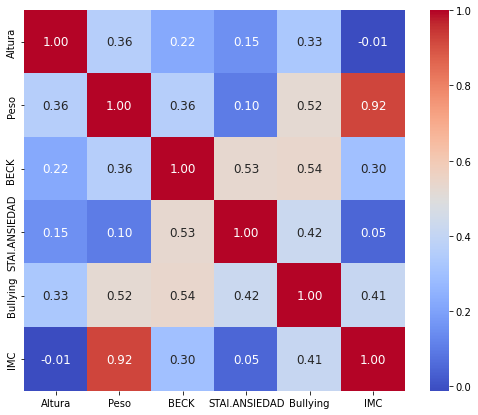

In [11]:
corr = df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Reducción de la dimensionalidad
Proceso de decodificación de datos

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [22]:
labelEncoder = LabelEncoder()
df["Edad"] = labelEncoder.fit_transform(df["Edad"])
df["Tipo de depresion"] = labelEncoder.fit_transform(df["Tipo de depresion"])
df["Tipo de ansiedad"] = labelEncoder.fit_transform(df["Tipo de ansiedad"])
df["Sufre de bullying"] = labelEncoder.fit_transform(df["Sufre de bullying"])
df["Tipo de sobrepeso"] = labelEncoder.fit_transform(df["Tipo de sobrepeso"])
df["Nivel de educación"] = labelEncoder.fit_transform(df["Nivel de educación"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                74 non-null     int64  
 1   Altura              74 non-null     float64
 2   Peso                74 non-null     float64
 3   BECK                74 non-null     float64
 4   Tipo de depresion   74 non-null     int64  
 5   STAI.ANSIEDAD       74 non-null     float64
 6   Tipo de ansiedad    74 non-null     int64  
 7   Bullying            74 non-null     float64
 8   Sufre de bullying   74 non-null     int64  
 9   IMC                 74 non-null     float64
 10  Tipo de sobrepeso   74 non-null     int64  
 11  Nivel de educación  74 non-null     int64  
dtypes: float64(6), int64(6)
memory usage: 7.5 KB


In [25]:
df

,Edad,Altura,Peso,BECK,Tipo de depresion,STAI.ANSIEDAD,Tipo de ansiedad,Bullying,Sufre de bullying,IMC,Tipo de sobrepeso,Nivel de educación
0,3,1.50,65.0,3.0,3,26.0,2,52.0,0,28.888889,4,0
1,0,1.65,61.0,0.0,3,26.0,2,49.0,1,22.405877,3,5
2,2,1.52,105.0,22.0,2,29.0,2,68.0,1,45.446676,2,4
3,0,1.60,54.0,1.0,3,26.0,2,42.0,1,21.093750,3,0
4,2,1.65,64.0,5.0,3,24.0,1,45.0,1,23.507805,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,2,1.68,80.0,4.0,3,27.0,2,79.0,1,28.344671,4,4
70,0,1.56,50.0,11.0,1,26.0,2,92.0,0,20.545694,3,2
71,0,1.62,46.0,2.0,3,22.0,3,40.0,0,17.527816,3,4
72,0,1.64,59.0,5.0,3,27.0,2,55.0,1,21.936347,3,4


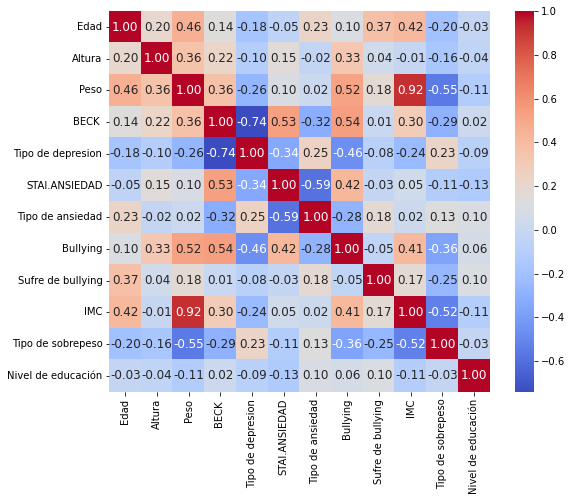

In [26]:
corr = df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Revisión de atipico

In [27]:
import numpy as np

def atipicos_columna(y, column):
    '''
        Busca y cuenta los atípicos en un vector pasado por parámetro.
        Se basa en el rango intercuartil.
    '''
    # Calcular rango intercuartil
    y_df = pd.DataFrame({'y': y})

    q25, q75 = np.percentile(y_df['y'], 25), np.percentile(y_df['y'], 75)
    iqr = q75 - q25

    # Calcule el rango de valores atípicos
    k = 1.5
    range_ir = iqr * k

    # Límites
    lower_bound_ir, upper_bound_ir = q25 - range_ir, q75 + range_ir

    # Creacion de mascaras y busqueda de atípicos y no atípicos
    outliers_mask_ir = [True if x < lower_bound_ir or x > upper_bound_ir else False for x in y_df['y']]
    no_outliers_mask_ir = [False if x < lower_bound_ir or x > upper_bound_ir else True for x in y_df['y']]

    outliers = y_df['y'][outliers_mask_ir]
    no_outliers = y_df['y'][no_outliers_mask_ir]

    print("-- Columna: ",column,"   \t->",outliers.shape[0])

def atipicos(df, inicio = 0):
    '''
        Busca y cuenta atípicos en todo el DataFrame pasado por parámetro
    '''
    print("Cantidad de atipicos: ")
    for column in df.columns[inicio:]:
        atipicos_columna(df[column].values, column)

In [28]:
atipicos(df)

Cantidad de atipicos: 
-- Columna:  Edad    	-> 0
-- Columna:  Altura    	-> 4
-- Columna:  Peso    	-> 1
-- Columna:  BECK     	-> 1
-- Columna:  Tipo de depresion    	-> 0
-- Columna:  STAI.ANSIEDAD    	-> 2
-- Columna:  Tipo de ansiedad    	-> 2
-- Columna:  Bullying    	-> 2
-- Columna:  Sufre de bullying    	-> 12
-- Columna:  IMC    	-> 1
-- Columna:  Tipo de sobrepeso    	-> 0
-- Columna:  Nivel de educación    	-> 0


Visualización de las distribuciones de cada una de las variables

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
    
    color = "orange"
    text=f"$\\mu$ = {data.mean():.3f}\n"
    text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

    bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
    ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    ax.set_title(title)

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

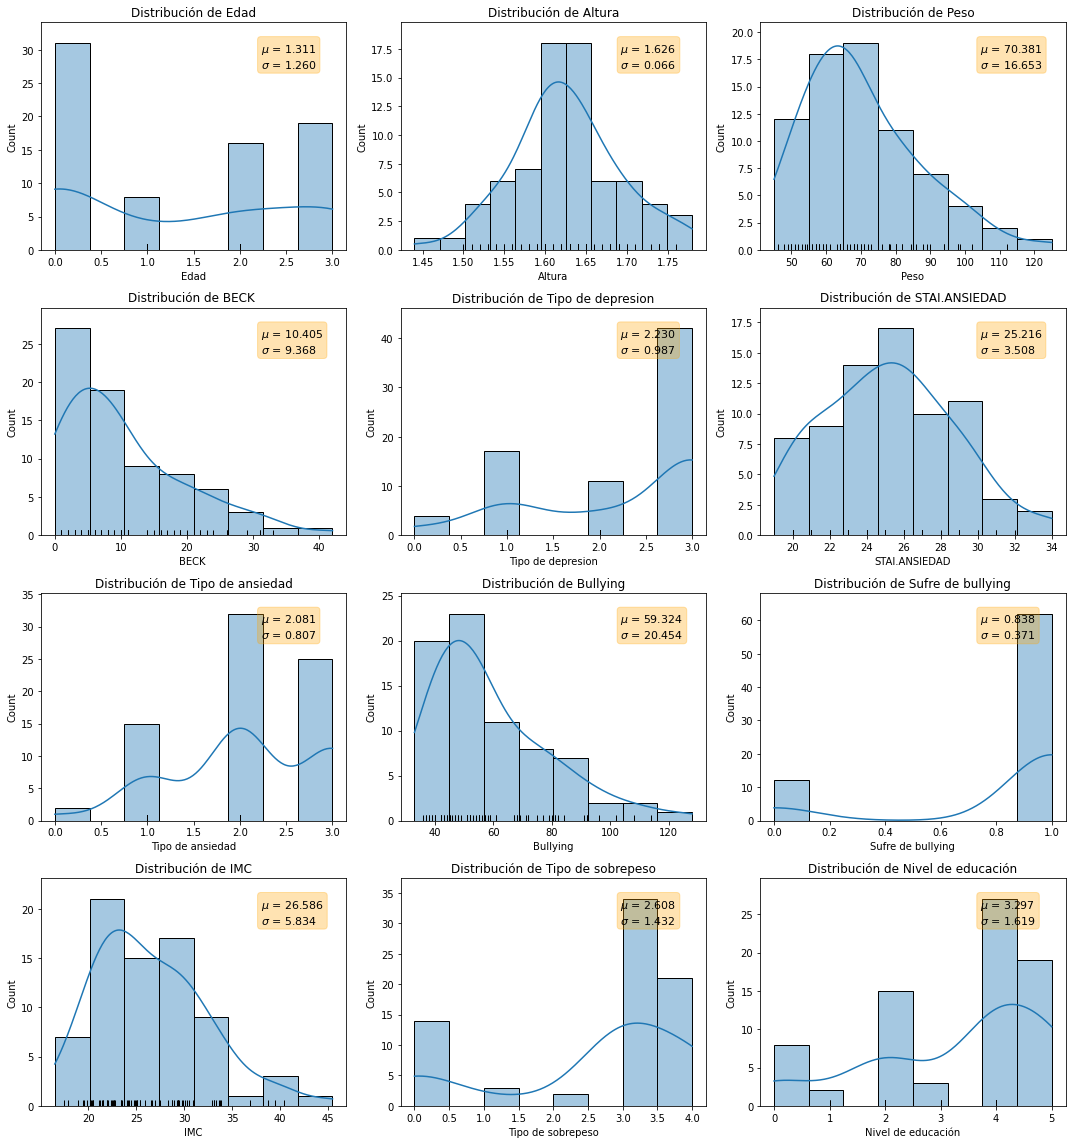

In [34]:
print_dataset(df, 4, 3)

Verificación de valores atípicos utilizando box plot

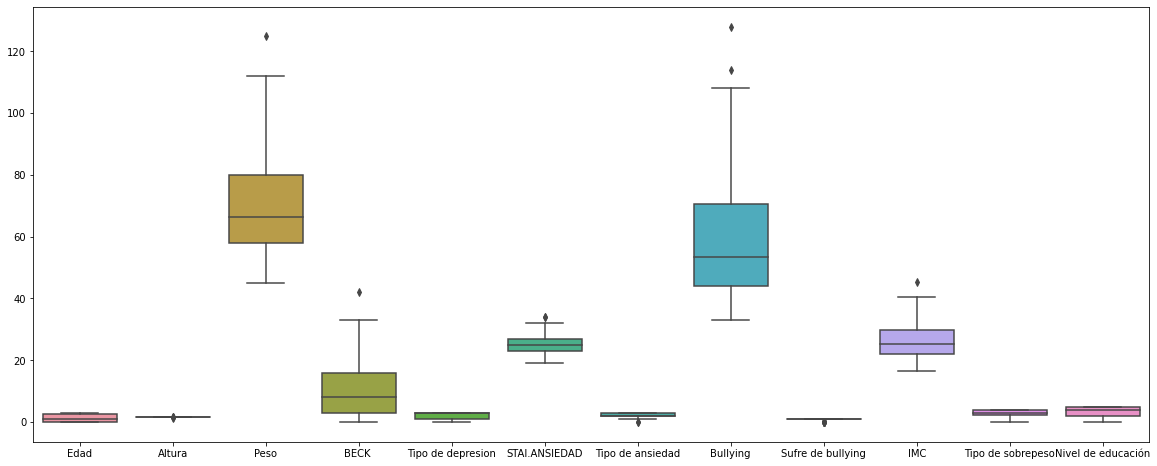

In [36]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()